## Carga de librerías

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import sklearn
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import scale
import sklearn.metrics as sm
from sklearn import datasets

%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

# GDP per cápita 2018

In [105]:
import os 
import pandas as pd
nb_path = os.path.abspath("Pobreza datos.ipynb")
gdp_csv = os.path.join(os.path.dirname(nb_path), "Datasets/GDPpC2018.csv")
gdp_data = pd.read_csv(gdp_csv, engine='python')

In [110]:
gdp_data=gdp_data.rename(columns={'ï»¿"LOCATION"':'ISO'})
gdp_data

,ISO,Country,SUBJECT,Subject,MEASURE,Measure,TIME,Time,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,T_GDP,Gross Domestic Product (GDP); millions,C,"National currency, current prices",2018,2018,NATCUR,National currency,6,Millions,NaN,NaN,1.952680e+06,NaN,NaN
1,AUS,Australia,T_GDPPOP,GDP per head of population,C,"National currency, current prices",2018,2018,NATCUR,National currency,0,Units,NaN,NaN,7.816129e+04,NaN,NaN
2,AUS,Australia,T_GDPHRS,GDP per hour worked,C,"National currency, current prices",2018,2018,NATCUR,National currency,0,Units,NaN,NaN,8.810204e+01,E,Estimated value
3,AUS,Australia,T_GDPEMP,GDP per person employed,C,"National currency, current prices",2018,2018,NATCUR,National currency,0,Units,NaN,NaN,1.517386e+05,E,Estimated value
4,AUS,Australia,T_GDP,Gross Domestic Product (GDP); millions,CPC,"USD, current prices, current PPPs",2018,2018,USD,US Dollar,6,Millions,NaN,NaN,1.326164e+06,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1184,EU27_2020,European Union â€“ 27 countries (from 01/02/2020),T_GDPHRS,GDP per hour worked,VPVOB,"USD, constant prices, 2015 PPPs",2018,2018,USD,US Dollar,0,Units,NaN,NaN,5.389208e+01,NaN,NaN
1185,EU27_2020,European Union â€“ 27 countries (from 01/02/2020),T_HRSTO,Hours worked for total employment; millions,PEHRS,Persons/Hours,2018,2018,HOUR,Hours,6,Millions,NaN,NaN,3.375552e+05,NaN,NaN
1186,EU27_2020,European Union â€“ 27 countries (from 01/02/2020),T_GPHRPO,Gap in labour utilisation with respect to the USA,GAP,Gap in % points,2018,2018,PC,Percentage,0,Units,NaN,NaN,-1.049154e+01,NaN,NaN
1187,EU27_2020,European Union â€“ 27 countries (from 01/02/2020),T_GDP,Gross Domestic Product (GDP); millions,VPVOB,"USD, constant prices, 2015 PPPs",2018,2018,USD,US Dollar,6,Millions,NaN,NaN,1.819155e+07,NaN,NaN


In [19]:
gdp_data.shape

(1189, 17)

In [108]:
gdp_data.columns

Index(['ï»¿"LOCATION"', 'Country', 'SUBJECT', 'Subject', 'MEASURE', 'Measure',
       'TIME', 'Time', 'Unit Code', 'Unit', 'PowerCode Code', 'PowerCode',
       'Reference Period Code', 'Reference Period', 'Value', 'Flag Codes',
       'Flags'],
      dtype='object')

In [16]:
# aquí mostramos a todos los registros de los países en la base de datos
# se repiten porque hay varios datos sobre cada país, por lo que haremos filtro
print(gdp_data.groupby('Country').size())

Country
Australia                                                                      26
Austria                                                                        26
BRIICS economies - Brazil, Russia, India, Indonesia, China and South Africa    12
Belgium                                                                        26
Brazil                                                                         15
Canada                                                                         26
Chile                                                                          26
China (People's Republic of)                                                   15
Colombia                                                                       15
Costa Rica                                                                     26
Czech Republic                                                                 26
Denmark                                                                        26
Estonia 

### Buscamos el dato que queremos
En este caso buscamos el GDP, GDP per head of population y vemos que hay 193 registros:
"Gross Domestic Product (GDP); millions                      193"
"GDP per head of population                                  191"

Hay otros datos interesantes como:
"Average hours worked per person employed                     43"

In [18]:
print(gdp_data.groupby('Subject').size())

Subject
Average hours worked per person employed                     43
GDP per head of population                                  191
GDP per hour worked                                         170
GDP per person employed                                     193
Gap in GDP per capita with respect to the USA                48
Gap in GDP per hour worked with respect to the USA           42
Gap in labour utilisation with respect to the USA            42
Gross Domestic Product (GDP); millions                      193
Gross national income per hour worked                        40
Hours worked for total employment; millions                  43
Labour utilisation (hours worked per head of population)     86
Total employment (number of persons employed); thousands     49
Total population; persons; thousands                         49
dtype: int64


### Aplicamos filtros
Una vez aplicados, podremos ver la tabla y sobre lo que trata de manera más clara

In [111]:
gdp_pop = gdp_data[(gdp_data['SUBJECT'] == 'T_GDPPOP') & (gdp_data['Unit Code'] == 'USD') & 
                   (gdp_data['MEASURE'] == 'CPC')]
gdp_pop = gdp_pop.drop(['Unit', 'PowerCode Code','MEASURE','TIME','PowerCode',
              'Reference Period Code','Reference Period','Flags','Flag Codes','SUBJECT'], axis = 1)
gdp_pop

,ISO,Country,Subject,Measure,Time,Unit Code,Value
5,AUS,Australia,GDP per head of population,"USD, current prices, current PPPs",2018,USD,53083.298202
22,AUT,Austria,GDP per head of population,"USD, current prices, current PPPs",2018,USD,57068.534859
39,BEL,Belgium,GDP per head of population,"USD, current prices, current PPPs",2018,USD,52668.407369
56,CAN,Canada,GDP per head of population,"USD, current prices, current PPPs",2018,USD,50239.988271
73,CZE,Czech Republic,GDP per head of population,"USD, current prices, current PPPs",2018,USD,41147.631519
90,DNK,Denmark,GDP per head of population,"USD, current prices, current PPPs",2018,USD,57459.169658
107,FIN,Finland,GDP per head of population,"USD, current prices, current PPPs",2018,USD,49749.057503
124,FRA,France,GDP per head of population,"USD, current prices, current PPPs",2018,USD,46456.107114
141,DEU,Germany,GDP per head of population,"USD, current prices, current PPPs",2018,USD,54954.686585
158,GRC,Greece,GDP per head of population,"USD, current prices, current PPPs",2018,USD,29680.902374


### Nuevo dataframe
Hacemos un nuevo dataframe para que sean sólamente los países y no conjuntos, como el G7, economías BRIICS, etc... y también lo hacemos funcional para la comparación con el MPI.
Por ahora lo mostraremos organizado en orden descendente.

In [112]:
gdp_df = gdp_pop.drop(index=[656,966,995,1072,1169],columns=['Subject','Measure','Time','Unit Code'])
gdp_df = gdp_df.sort_values(by=['Country'])
gdp_df.at[543,'Country']= 'China'
gdp_df

,ISO,Country,Value
5,AUS,Australia,53083.298202
22,AUT,Austria,57068.534859
39,BEL,Belgium,52668.407369
514,BRA,Brazil,15272.368773
56,CAN,Canada,50239.988271
527,CHL,Chile,24686.142353
543,CHN,China,15584.651285
1007,COL,Colombia,15256.201624
1107,CRI,Costa Rica,20988.161597
73,CZE,Czech Republic,41147.631519


# Datos estadísticos nacionales

In [23]:
import os 
import pandas as pd
nb_path = os.path.abspath("Pobreza datos.ipynb")
mpi_n_csv = os.path.join(os.path.dirname(nb_path), "Datasets/MPI_national.csv")
datos=pd.read_csv(mpi_n_csv, engine='python')

In [9]:
datos

,ISO,Country,MPI Urban,Headcount Ratio Urban,Intensity of Deprivation Urban,MPI Rural,Headcount Ratio Rural,Intensity of Deprivation Rural
0,KAZ,Kazakhstan,0.000,0.0,33.3,0.000,0.09,33.3
1,SRB,Serbia,0.000,0.1,41.4,0.002,0.50,40.3
2,KGZ,Kyrgyzstan,0.000,0.1,40.2,0.003,0.70,37.1
3,TUN,Tunisia,0.000,0.1,35.6,0.012,3.18,38.7
4,ARM,Armenia,0.001,0.2,33.3,0.001,0.39,36.9
...,...,...,...,...,...,...,...,...
97,CAF,Central African Republic,0.289,58.2,49.7,0.519,89.79,57.8
98,LBR,Liberia,0.290,60.5,48.0,0.481,84.86,56.6
99,SOM,Somalia,0.293,55.9,52.4,0.651,96.92,67.2
100,TCD,Chad,0.351,64.8,54.1,0.609,93.41,65.2


In [36]:
filas=len(datos)
filas

102

In [11]:
tipo_datos = pd.read_csv ("MPI_national.csv")

In [14]:
tipo_datos.dtypes

ISO                                object
Country                            object
MPI Urban                         float64
Headcount Ratio Urban             float64
Intensity of Deprivation Urban    float64
MPI Rural                         float64
Headcount Ratio Rural             float64
Intensity of Deprivation Rural    float64
dtype: object

In [25]:
datos['MPI Urban'].describe()

count    102.000000
mean       0.078343
std        0.093693
min        0.000000
25%        0.007250
50%        0.034500
75%        0.125750
max        0.459000
Name: MPI Urban, dtype: float64

In [27]:
datos['Headcount Ratio Urban'].describe()

count    102.000000
mean      16.809804
std       18.498448
min        0.000000
25%        1.950000
50%        8.400000
75%       27.575000
max       82.500000
Name: Headcount Ratio Urban, dtype: float64

In [28]:
datos['Intensity of Deprivation Urban'].describe()

count    102.000000
mean      41.678431
std        5.135908
min       33.300000
25%       37.200000
50%       41.550000
75%       45.675000
max       55.700000
Name: Intensity of Deprivation Urban, dtype: float64

In [29]:
datos['MPI Rural'].describe()

count    102.000000
mean       0.214676
std        0.201208
min        0.000000
25%        0.025000
50%        0.160000
75%        0.384500
max        0.669000
Name: MPI Rural, dtype: float64

In [30]:
datos['Headcount Ratio Rural'].describe()

count    102.000000
mean      40.036176
std       33.270714
min        0.090000
25%        6.745000
50%       36.055000
75%       70.130000
max       96.920000
Name: Headcount Ratio Rural, dtype: float64

In [31]:
datos['Intensity of Deprivation Rural'].describe()

count    102.000000
mean      46.824510
std        8.783191
min       33.300000
25%       40.225000
50%       44.800000
75%       53.425000
max       69.500000
Name: Intensity of Deprivation Rural, dtype: float64

In [34]:
datos['Headcount Ratio Rural'].median()

36.055

# Datos estadísticos subnacionales

In [59]:
import os
import pandas as pd 
from matplotlib import pyplot as plt 
nb_path = os.path.abspath("Pobreza datos.ipynb")
mpi_s_csv = os.path.join(os.path.dirname(nb_path), "Datasets/MPI_subnational.csv")
data=pd.read_csv(mpi_s_csv, engine='python')

In [60]:
data

,ISO country code,Country,Sub-national region,World region,MPI National,MPI Regional,Headcount Ratio Regional,Intensity of deprivation Regional
0,AFG,Afghanistan,Badakhshan,South Asia,0.295,0.387,67.5,57.3
1,AFG,Afghanistan,Badghis,South Asia,0.295,0.466,79.3,58.8
2,AFG,Afghanistan,Baghlan,South Asia,0.295,0.300,59.7,50.3
3,AFG,Afghanistan,Balkh,South Asia,0.295,0.301,55.7,54.1
4,AFG,Afghanistan,Bamyan,South Asia,0.295,0.325,61.0,53.3
...,...,...,...,...,...,...,...,...
979,ZWE,Zimbabwe,Mashonaland West,Sub-Saharan Africa,0.152,0.192,43.7,44.1
980,ZWE,Zimbabwe,Masvingo,Sub-Saharan Africa,0.152,0.174,38.9,44.7
981,ZWE,Zimbabwe,Matabeleland North,Sub-Saharan Africa,0.152,0.238,53.4,44.5
982,ZWE,Zimbabwe,Matabeleland South,Sub-Saharan Africa,0.152,0.164,38.2,42.8


In [62]:
type(data)

pandas.core.frame.DataFrame

In [9]:
data["ISO_country_code"].describe()

count     984
unique     78
top       NGA
freq       37
Name: ISO_country_code, dtype: object

No se puede sacar mediana debido a que no son número por lo tanto no se puden covertir los datos de una cadena de caracteres "string" a números "float".

In [10]:
data.Country

0      Afghanistan
1      Afghanistan
2      Afghanistan
3      Afghanistan
4      Afghanistan
          ...     
979       Zimbabwe
980       Zimbabwe
981       Zimbabwe
982       Zimbabwe
983       Zimbabwe
Name: Country, Length: 984, dtype: object

In [11]:
data["Country"].describe()

count         984
unique         78
top       Nigeria
freq           37
Name: Country, dtype: object

In [23]:
data.Sub_national_region

0              Badakhshan
1                 Badghis
2                 Baghlan
3                   Balkh
4                  Bamyan
              ...        
979      Mashonaland West
980              Masvingo
981    Matabeleland North
982    Matabeleland South
983              Midlands
Name: Sub_national_region, Length: 984, dtype: object

In [24]:
data["Sub_national_region"].describe()

count         984
unique        928
top       Eastern
freq            8
Name: Sub_national_region, dtype: object

In [25]:
data.World_region

0              South Asia
1              South Asia
2              South Asia
3              South Asia
4              South Asia
              ...        
979    Sub-Saharan Africa
980    Sub-Saharan Africa
981    Sub-Saharan Africa
982    Sub-Saharan Africa
983    Sub-Saharan Africa
Name: World_region, Length: 984, dtype: object

In [26]:
data["World_region"].describe()

count                    984
unique                     6
top       Sub-Saharan Africa
freq                     431
Name: World_region, dtype: object

In [28]:
data.MPI_National

0      0.295
1      0.295
2      0.295
3      0.295
4      0.295
       ...  
979    0.152
980    0.152
981    0.152
982    0.152
983    0.152
Name: MPI_National, Length: 984, dtype: float64

In [29]:
data["MPI_National"].describe()

count    984.000000
mean       0.204107
std        0.160248
min        0.006000
25%        0.066000
50%        0.174000
75%        0.303000
max        0.605000
Name: MPI_National, dtype: float64

In [30]:
data["MPI_National"].median()

0.174

In [31]:
data.MPI_Regional

0      0.387
1      0.466
2      0.300
3      0.301
4      0.325
       ...  
979    0.192
980    0.174
981    0.238
982    0.164
983    0.176
Name: MPI_Regional, Length: 984, dtype: float64

In [32]:
data["MPI_Regional"].describe()

count    984.000000
mean       0.211330
std        0.183621
min        0.000000
25%        0.053000
50%        0.155000
75%        0.341500
max        0.744000
Name: MPI_Regional, dtype: float64

In [33]:
data["MPI_Regional"].median()

0.155

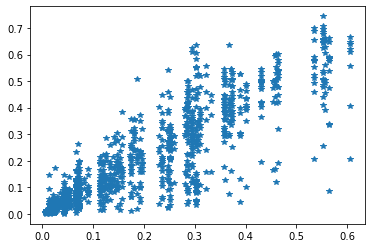

In [42]:
plt.plot(data.MPI_National, data.MPI_Regional, "*")
plt.show()

In [34]:
data.Headcount_Ratio_Regional

0      67.5
1      79.3
2      59.7
3      55.7
4      61.0
       ... 
979    43.7
980    38.9
981    53.4
982    38.2
983    40.5
Name: Headcount_Ratio_Regional, Length: 984, dtype: float64

In [35]:
data["Headcount_Ratio_Regional"].describe()

count    984.000000
mean      40.184451
std       29.981403
min        0.000000
25%       12.475000
50%       33.950000
75%       66.725000
max       99.000000
Name: Headcount_Ratio_Regional, dtype: float64

In [36]:
data["Headcount_Ratio_Regional"].median()

33.95

In [37]:
data.Intensity_of_deprivation_Regional

0      57.3
1      58.8
2      50.3
3      54.1
4      53.3
       ... 
979    44.1
980    44.7
981    44.5
982    42.8
983    43.5
Name: Intensity_of_deprivation_Regional, Length: 984, dtype: float64

In [38]:
data["Intensity_of_deprivation_Regional"].describe()

count    983.000000
mean      47.180977
std        8.047225
min       33.300000
25%       41.400000
50%       45.600000
75%       51.900000
max       75.900000
Name: Intensity_of_deprivation_Regional, dtype: float64

In [39]:
data["Intensity_of_deprivation_Regional"].median()

45.6

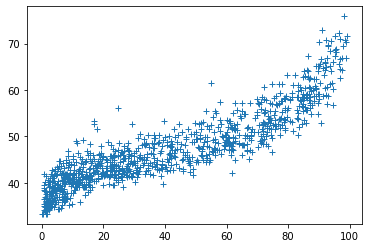

In [43]:
plt.plot(data.Headcount_Ratio_Regional, data.Intensity_of_deprivation_Regional, "+")
plt.show()

In [66]:
data.head()

,ISO country code,Country,Sub-national region,World region,MPI National,MPI Regional,Headcount Ratio Regional,Intensity of deprivation Regional
0,AFG,Afghanistan,Badakhshan,South Asia,0.295,0.387,67.5,57.3
1,AFG,Afghanistan,Badghis,South Asia,0.295,0.466,79.3,58.8
2,AFG,Afghanistan,Baghlan,South Asia,0.295,0.300,59.7,50.3
3,AFG,Afghanistan,Balkh,South Asia,0.295,0.301,55.7,54.1
4,AFG,Afghanistan,Bamyan,South Asia,0.295,0.325,61.0,53.3


## Generamos datos filtrados a comparar

In [118]:
mpi_df = data.drop(columns=['Intensity of deprivation Regional',
                            'World region','MPI Regional','MPI Regional','Headcount Ratio Regional',
                           'Sub-national region'])
mpi_df = mpi_df.drop_duplicates(subset='Country')
mpi_df = mpi_df.rename(columns={'ISO country code':'ISO'})
mpi_df

,ISO,Country,MPI National
0,AFG,Afghanistan,0.295
34,BDI,Burundi,0.454
39,BEN,Benin,0.307
51,BFA,Burkina Faso,0.535
64,BGD,Bangladesh,0.196
...,...,...,...
931,UZB,Uzbekistan,0.008
937,VNM,Viet Nam,0.029
943,YEM,Yemen,0.236
964,ZMB,Zambia,0.281


# Conclusiones sobre los datos.

En las prmeras cuatro columnas de la base de datos no es posibe sacar la mediana, los máximos y los mínimos, de los grupos de datos, debido a que son datos strings y esto solo esposible debido a que solo se pueden hacer con datos de tipo float, pero con la función de drscribe  obtuvimos el número de varabes de la columa determinada, la frecuencia y variable top. Por otro lado en las Medidas de Pobreza Multidimensional, con datos númericos empezamos a tener que el promedio del MPI Nacional es de 0.20 lo que nos muestra un indice alto, lo que nos indica que un mayor porcentaje de los paises tiene altos niveles de pobresa nacional y en comparacion con el promedio del MPI Regional que es de 0.21 que es un poco más alto que el anterior (describiendo un indice de pobreza aun más alto en sectres más pequeños de la nación), en la columna de de MPI Nacional tenemos un máximo de 0.605,un mínimo de 0.006, una mediana de 0.174, lo que nos indica que existe un rango demasiado amplio entre los datos (observando en máximo y el mínimo) y se tiene una mediana que nos indica en que rango se tienen más los datos. Por otro lados en la columna de MPI Regional se tiene un máximo de 0.744, un mínimo de 0.000 y una mediana de 0.155, lo que nos índica un rango aún más rande que en la anterior columna debido a que ahora podemos saber que se tiene datos con un indice de pobreza de cero (lo que es un buen aspecto)y con la mediana podemos tener una variable ni siquiera cerca del valor máximo, si lo ponemos en cuestion de personas y lugares, podemos pensar que en la nacion tenemos lugares con una buena economia y empleos dandonos como resultados rangos amplios en las columnas anteriormente mencionadas. Al poner estas columnas en una gráfica para poder ver de manera visual el comportamiento de las varibales podemos observar que los datos mayormente se acumulan entre los puntos 0 al 0.3, esto nos quiere decir que ambas columnas tiene indices de pobreza multidimensional respectivamente bajos pero al ser demasiados hace que los promedios sean amplios.

Ahora analizando las últimas dos columnas y sus variables podemos notar que en la columna de "Headcount_Ratio_Regional" tenemos una media de 40.18, un máximo de 99, un mínimo de 0 y una mediana de 33.95, estos datos nos muestran que la taza de recuento nacional tienen un rango entre el máx y el mín muy amplio, la media nos indica que su promedio esta por debajo de lo que se podria pronosticar (suponinendo que del 0 al 99 las variables fueran crecientes por lo tante podemos concluir con ayuda de la mediana que se tienen más datas menores. 
En la columna de "Intensity_of_deprivation_Regional" tenemos una media de 47.18, un valor máximo de 75.9, un valor mínimo de 33.3 y una mediana de 45.6.
Comparando estas columnas y colocandolas en una gráfica observamos que los datos se acumulan al inicio de los rangos de 0 a 20 con respecto a x y de 0 a 50 con respecto a y. Lo que nos indica tazas de de recuento e intensidades de privación respectivamente bajos.

# Comparación de los datos

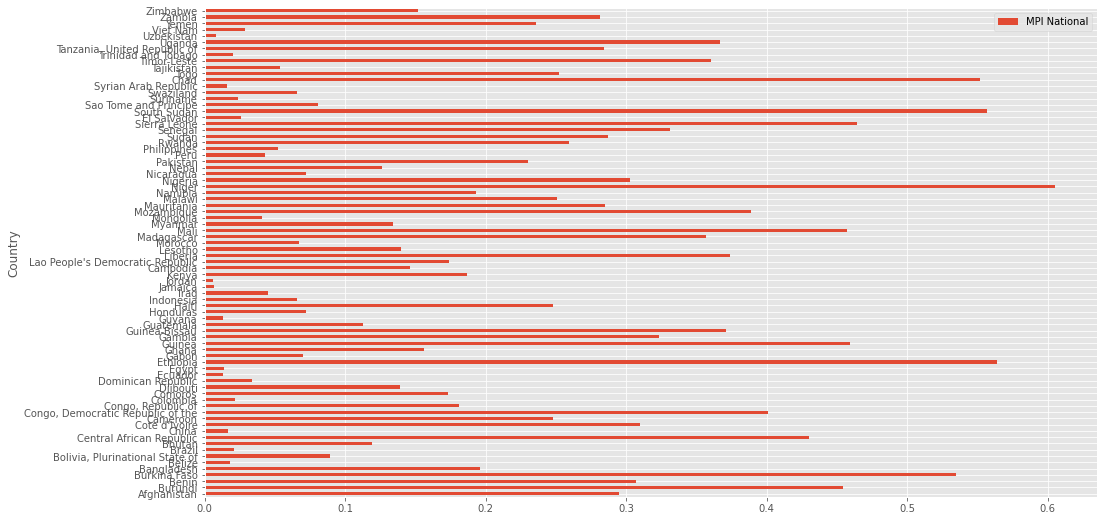

In [76]:
#usamos las tablas filtradas y ordenadas mpi_df gdp_df
mpi_df.set_index('Country').plot.barh(stacked=True);

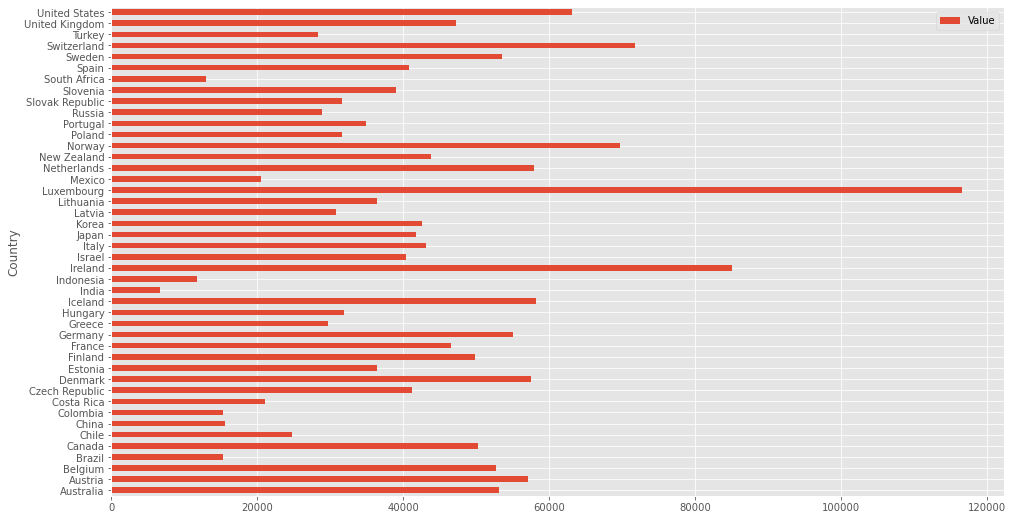

In [79]:
gdp_df.set_index('Country').plot.barh(stacked=True);

In [142]:
#hacemos lista de países para comparar diferencias y eliminarlas 
array1 = mpi_df.reset_index()
array2 = gdp_df.reset_index()
array1 = array1.drop(columns=['index','Country'])
array2 = array2.drop(columns=['index','Country'])
print(array1,array2)

    ISO  MPI National
0   AFG         0.295
1   BDI         0.454
2   BEN         0.307
3   BFA         0.535
4   BGD         0.196
..  ...           ...
73  UZB         0.008
74  VNM         0.029
75  YEM         0.236
76  ZMB         0.281
77  ZWE         0.152

[78 rows x 2 columns]     ISO          Value
0   AUS   53083.298202
1   AUT   57068.534859
2   BEL   52668.407369
3   BRA   15272.368773
4   CAN   50239.988271
5   CHL   24686.142353
6   CHN   15584.651285
7   COL   15256.201624
8   CRI   20988.161597
9   CZE   41147.631519
10  DNK   57459.169658
11  EST   36406.045789
12  FIN   49749.057503
13  FRA   46456.107114
14  DEU   54954.686585
15  GRC   29680.902374
16  HUN   31831.981050
17  ISL   58225.803799
18  IND    6678.341255
19  IDN   11765.291834
20  IRL   85027.004207
21  ISR   40351.274181
22  ITA   43097.264513
23  JPN   41724.030338
24  KOR   42486.739803
25  LVA   30814.222453
26  LTU   36346.416600
27  LUX  116480.803410
28  MEX   20518.580821
29  NLD   57899.824977


[None]
